In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv("analyst_data.csv")
df = df[df['dt']<'2017-01-01']
df['year'] = pd.to_datetime(df['dt']).dt.year
df['month'] = pd.to_datetime(df['dt']).dt.month
df['day'] = pd.to_datetime(df['dt']).dt.day
df = df.sort_values(by=['year','month','day']).drop_duplicates(subset=['year', 'month'], keep='last')
df = df.drop(["year", "month", "day"], axis=1)
df = df.set_index('dt')
df = df.dropna()
df

,A1,A2,A3
dt,,,
2003-09-30,102.70,44.38,50.10
2003-10-31,101.74,44.38,50.10
2003-11-28,101.72,44.38,50.10
2003-12-31,102.15,44.38,50.10
2004-01-30,102.60,44.38,50.10
...,...,...,...
2016-08-31,112.57,124.78,58.55
2016-09-30,112.42,125.64,59.10
2016-10-31,111.30,121.94,57.97


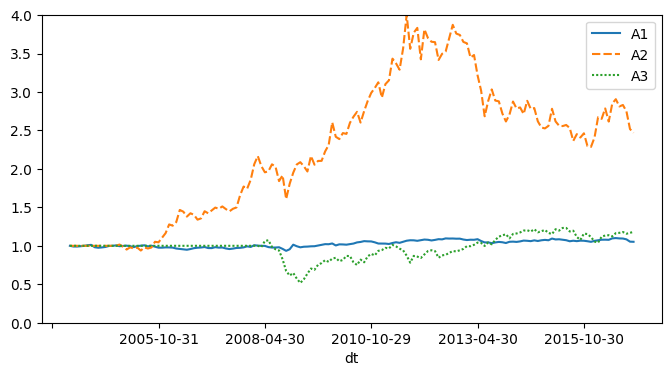

In [19]:
rate = df/df.iloc[0]
plt.figure(figsize=(8,4))
sns.lineplot(data=rate)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.ylim((0, rate.max().max()))
plt.show()

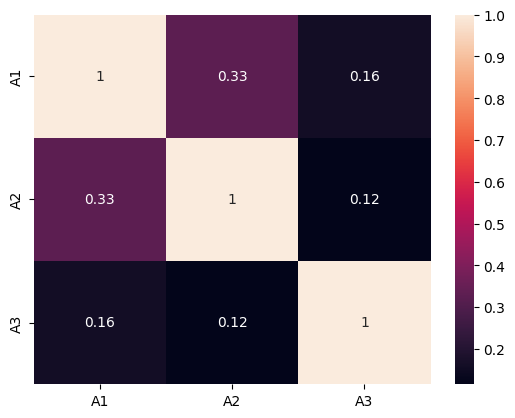

In [4]:
sns.heatmap(df.pct_change().corr(), annot=True)
plt.show()

<Axes: >

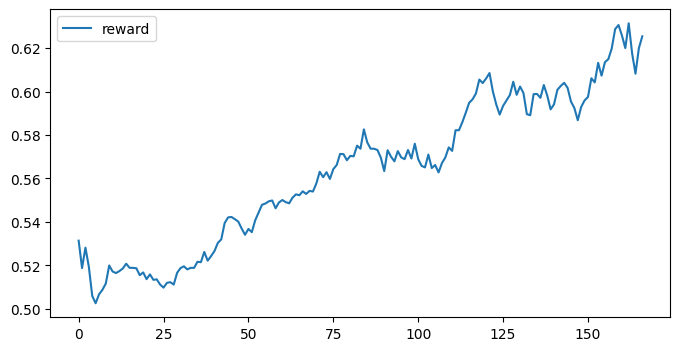

In [21]:
df = pd.read_csv("reward.csv",header=None)
df = df.rename(columns={0:'reward'})
plt.figure(figsize=(8,4))
sns.lineplot(data=df)